# Sheridan Kamal

## DATA 73500 - Assignment 1 (Due 2/24/20, 6:30p)


### Project
This project seeks to determine if there is a relationship between water quality and waterborne illness in NYC. The information from this analysis could be used to help city and government agencies to determine if waterborne illness is truly affected by water quality or if there are other factors, which we have not or could not have accounted for, that influence waterborne illness rates in NYC.

### Data
Using data from the 311 dataset (https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data), I aggregated water quality complaints and waterborne illness complaints by borough and by year from 2010 to 2019 for a total of 50 data points, with 10 data points per borough and 5 data points per year.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

data = pd.read_csv('311 Data - Water Quality and Illness.csv')
data['Year'] = pd.to_datetime(data['Year'], format = '%Y') #Date set to first day of the year per UNIX convention
data.head()

,Year,Borough,Waterborne_Illness,Water_Quality
0,2010-01-01,Bronx,7,556
1,2010-01-01,Brooklyn,28,1783
2,2010-01-01,Manhattan,17,584
3,2010-01-01,Queens,13,3525
4,2010-01-01,Staten Island,3,1694


In [3]:
data.corr()

,Waterborne_Illness,Water_Quality
Waterborne_Illness,1.000000,0.207398
Water_Quality,0.207398,1.000000


Waterborne Illness and Water Quality are positively, but weakly correlated with each other.

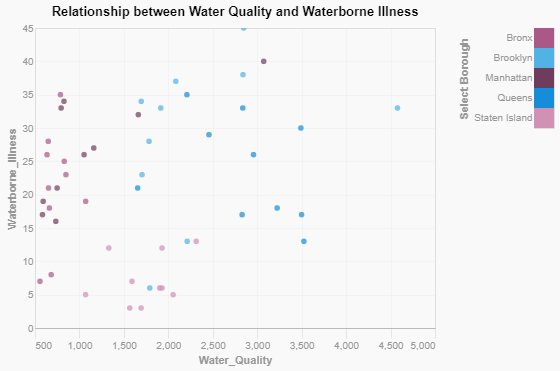

In [4]:
#Must have altair and vega packages installed
#Run cell for interactivity
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('quartz')

click = alt.selection_multi(encodings=['color'])
scatter = alt.Chart(data).mark_circle().encode(alt.X('Water_Quality', scale=alt.Scale(zero = False)), y='Waterborne_Illness', color=alt.Color('Borough', legend=None), tooltip=['Borough', 'Water_Quality', 'Waterborne_Illness']).transform_filter(click).properties(title='Relationship between Water Quality and Waterborne Illness').interactive()
legend = alt.Chart(data).mark_rect().encode(y=alt.Y('Borough', axis=alt.Axis(title='Select Borough')), color=alt.condition(click, 'Borough', alt.value('lightgray'), legend=None)).properties(selection=click)
chart = scatter | legend
chart.display() #Downloadable as SVG and PNG

### Models
I chose to run two regression models, a standard OLS regression model with Waterborne Illness equal to Water Quality and a PLM regression model with Waterborne Illness equal to Water Quality plus time and entity fixed effects.

These models were chosen because I wanted to determine if the year and borough would have an effect on the model. To do this, I compared the R-squared values of both models, the model with the higher R-squared value is the better model as it explains the most variance of Waterborne Illness.

In [5]:
result = sm.ols(formula = "Waterborne_Illness ~ Water_Quality", data = data, missing = 'drop').fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Waterborne_Illness   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.157
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.148
Time:                        18:37:54   Log-Likelihood:                -190.04
No. Observations:                  50   AIC:                             384.1
Df Residuals:                      48   BIC:                             387.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.3682      3.230      5.378      0.000      10.875      23.862
Water_Quality     0.0024      0.002      1.469      0.148      -0.001       0.006
==============================================================================
Omnibus:                       10.121   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.888
Skew:                          -0.103   Prob(JB):                        0.236
Kurtosis:                       1.841   Cond. No.                     4.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the coefficient on the Intercept is significant at the 1% level, the coefficient on Water Quality is only significant at the 15% level. The model also has a low R-squared value meaning that only 4.3% of the variance of Waterborne Illness is explained by Water Quality.

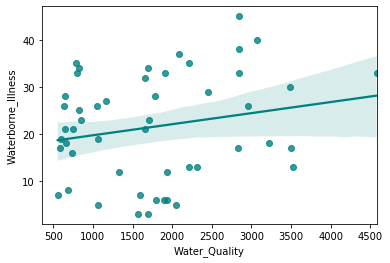

In [6]:
sns.regplot(x = 'Water_Quality', y = 'Waterborne_Illness', color = 'teal', data = data, marker = 'o')

In [7]:
result2 = sm.ols(formula = "Waterborne_Illness ~ Water_Quality + C(Year) + C(Borough)", data = data, missing = 'drop').fit()
#The generation of the dummy variables for year and borough make the model equivalent to a PLM model even though OLS is used
result2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Waterborne_Illness   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     10.60
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           9.16e-09
Time:                        18:37:54   Log-Likelihood:                -149.73
No. Observations:                  50   AIC:                             329.5
Df Residuals:                      35   BIC:                             358.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      11.8598      3.237      3.664      0.001       5.289      18.431
C(Year)[T.Timestamp('2011-01-01 00:00:00')]    -2.6839      3.656     -0.734      0.468     -10.105       4.738
C(Year)[T.Timestamp('2012-01-01 00:00:00')]     0.3090      3.655      0.085      0.933      -7.112       7.729
C(Year)[T.Timestamp('2013-01-01 00:00:00')]     9.9918      3.658      2.731      0.010       2.565      17.418
C(Year)[T.Timestamp('2014-01-01 00:00:00')]    13.6874      3.655      3.745      0.001       6.267      21.108
C(Year)[T.Timestamp('2015-01-01 00:00:00')]    15.0769      3.655      4.125      0.000       7.657      22.497
C(Year)[T.Timestamp('2016-01-01 00:00:00')]    14.6380      3.842      3.810      0.001       6.838      22.438
C(Year)[T.Timestamp('2017-01-01 00:00:00')]     8.9728      3.860      2.325      0.026       1.137      16.809
C(Year)[T.Timestamp('2018-01-01 00:00:00')]     9.0508      3.789      2.389      0.022       1.359      16.743
C(Year)[T.Timestamp('2019-01-01 00:00:00')]     7.4505      3.729      1.998      0.054      -0.119      15.020
C(Borough)[T.Brooklyn]                          4.7465      3.835      1.238      0.224      -3.038      12.531
C(Borough)[T.Manhattan]                         4.7195      2.672      1.766      0.086      -0.705      10.144
C(Borough)[T.Queens]                           -1.4126      4.559     -0.310      0.758     -10.667       7.842
C(Borough)[T.Staten Island]                   -15.8250      3.128     -5.059      0.000     -22.176      -9.474
Water_Quality                                   0.0020      0.002      1.148      0.259      -0.002       0.006
==============================================================================
Omnibus:                        1.395   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.650
Skew:                           0.187   Prob(JB):                        0.722
Kurtosis:                       3.415   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the coefficient on the Intercept is significant at the 1% level, the coefficient on Water Quality is not significant as it has a high p-value. The model  has a high R-squared value meaning that 80.9% of the variance of Waterborne Illness is explained by Water Quality.